# Task 7-Timeline Analysis Covid-19

### Importing Needed Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [4]:
df = pd.read_csv("owid-covid-data.csv")

In [5]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-01-28,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-01-29,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-01-30,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-01-31,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-02-01,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.285100e+04,61694.000000,60738.000000,4.491700e+04,61694.000000,60738.000000,52543.000000,61371.000000,60420.000000,44622.000000,61371.000000,60420.000000,41259.000000,4820.000000,4820.000000,5779.000000,5779.000000,470.000000,470.000000,769.000000,769.000000,2.489400e+04,2.484000e+04,24840.000000,24894.000000,2.775400e+04,27754.000000,25801.000000,25193.000000,53997.000000,6.149600e+04,60197.000000,58589.000000,57936.000000,58266.000000,58905.000000,40099.000000,59487.000000,60197.000000,46237.000000,45591.000000,30727.000000,53989.000000,61173.000000,59227.000000
mean,2.272200e+05,2256.037832,2228.814717,8.347782e+03,51.280157,50.972719,3788.110146,41.300374,40.661125,105.672337,0.739033,0.727910,1.043347,874.400000,17.312042,4522.828171,105.492197,242.392538,9.418857,2498.588088,80.810404,3.013358e+04,2.700170e+06,94.170490,0.998868,2.940010e+04,0.982805,0.074858,177.147684,53.316841,8.186739e+07,312.292269,30.186695,8.584336,5.433925,18355.764986,13.901559,262.439188,7.899254,10.398452,32.685774,50.323037,2.998905,72.859184,0.708844
std,2.195398e+06,21572.786296,21059.985080,6.539131e+04,431.640602,417.099826,7694.437288,138.214553,110.776484,202.300237,3.002658,2.173347,0.383155,2372.795746,23.238193,11552.549390,156.820521,540.097209,21.707172,6192.638001,243.608266,1.227008e+05,1.232202e+07,190.374615,1.847425,1.144071e+05,1.709236,0.095368,883.861159,27.536825,5.807427e+08,1546.917997,9.104327,6.165487,4.204853,19388.449900,20.222857,120.484607,4.195472,10.367750,13.519275,31.732057,2.438888,7.542156,0.153612
min,1.000000e+00,-10034.000000,-525.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.743000e+03,1.000000e+00,0.000000,-0.398000,0.000000e+00,0.000000,0.000000,1.400000,0.000000,8.090000e+02,1.980000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,3.790000e+02,0.000000,0.429000,2.200000e+01,0.000000,0.000000,78.655000,0.000000,0.081000,3.934250,0.000000,0.000000,0.880000,11.000000,2.262000,40.000000,11.324000,3.898500,0.966750,16.250000,4.567000,1.082250e+03,6.961775e+04,4.662750,0.078000,1.137000e+03,0.079000,0.011000,9.400000,34.260000,2.225728e+06,35.879000,21.700000,3.402000,2.034000,3823.194000,0.600000,170.050000,5.290000,1.900000,21.600000,19.351000,1.300000,67.270000,0.588000
50%,3.850000e+03,14.000000,19.714000,1.240000e+02,0.000000,0.286000,604.255000,1.756000,2.886500,19.983000,0.000000,0.026000,1.050000,60.000000,7.215000,249.000000,42.024000,19.893500,2.303000,146.811000,18.250000,4.070000e+03,3.200120e+05,24.302500,0.366000,4.309500e+03,0.376000,0.037000,25.500000,57.410000,9.449321e+06,82.600000,29.400000,6.211000,3.564000,11840.846000,2.200000,243.964000,7.110000,6.200000,31.400000,49.542000,2.397000,74.250000,0.736000
75%,3.793600e+04,263.000000,284.857000,1.063000e+03,4.000000,4.571000,3836.048000,24.537500,27.255750,96.468000,0.317000,0.418000,1.210000,475.250000,23.244750,2099.000000,117.149000,180.084000,8

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61819 entries, 0 to 61818
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            61496 non-null  object 
 1   continent                           61172 non-null  object 
 2   location                            61819 non-null  object 
 3   date                                61819 non-null  object 
 4   total_cases                         52851 non-null  float64
 5   new_cases                           61694 non-null  float64
 6   new_cases_smoothed                  60738 non-null  float64
 7   total_deaths                        44917 non-null  float64
 8   new_deaths                          61694 non-null  float64
 9   new_deaths_smoothed                 60738 non-null  float64
 10  total_cases_per_million             52543 non-null  float64
 11  new_cases_per_million               61371

In [8]:
df.shape

(61819, 50)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 50)


In [10]:
df.count()

iso_code                              61496
continent                             61172
location                              61819
date                                  61819
total_cases                           52851
new_cases                             61694
new_cases_smoothed                    60738
total_deaths                          44917
new_deaths                            61694
new_deaths_smoothed                   60738
total_cases_per_million               52543
new_cases_per_million                 61371
new_cases_smoothed_per_million        60420
total_deaths_per_million              44622
new_deaths_per_million                61371
new_deaths_smoothed_per_million       60420
reproduction_rate                     41259
icu_patients                           4820
icu_patients_per_million               4820
hosp_patients                          5779
hosp_patients_per_million              5779
weekly_icu_admissions                   470
weekly_icu_admissions_per_millio

### Checking the Missing or Null values

In [11]:
print(df.isnull().sum())

iso_code                                323
continent                               647
location                                  0
date                                      0
total_cases                            8968
new_cases                               125
new_cases_smoothed                     1081
total_deaths                          16902
new_deaths                              125
new_deaths_smoothed                    1081
total_cases_per_million                9276
new_cases_per_million                   448
new_cases_smoothed_per_million         1399
total_deaths_per_million              17197
new_deaths_per_million                  448
new_deaths_smoothed_per_million        1399
reproduction_rate                     20560
icu_patients                          56999
icu_patients_per_million              56999
hosp_patients                         56040
hosp_patients_per_million             56040
weekly_icu_admissions                 61349
weekly_icu_admissions_per_millio

In [12]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-01-23,NaN,0.0,NaN,NaN,NaN
1,2020-01-24,NaN,0.0,NaN,NaN,NaN
2,2020-01-25,NaN,0.0,NaN,NaN,NaN
3,2020-01-26,NaN,0.0,NaN,NaN,NaN
4,2020-01-27,NaN,0.0,NaN,NaN,NaN


In [13]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-12-06,10718.0,101.0,291.0,548.0,177041.0
2020-12-07,10839.0,121.0,294.0,1270.0,178311.0
2020-12-08,10912.0,73.0,303.0,NaN,NaN
2020-12-09,11007.0,95.0,304.0,NaN,NaN
2020-12-10,11081.0,74.0,305.0,NaN,NaN


Text(0.5, 0, 'Month')

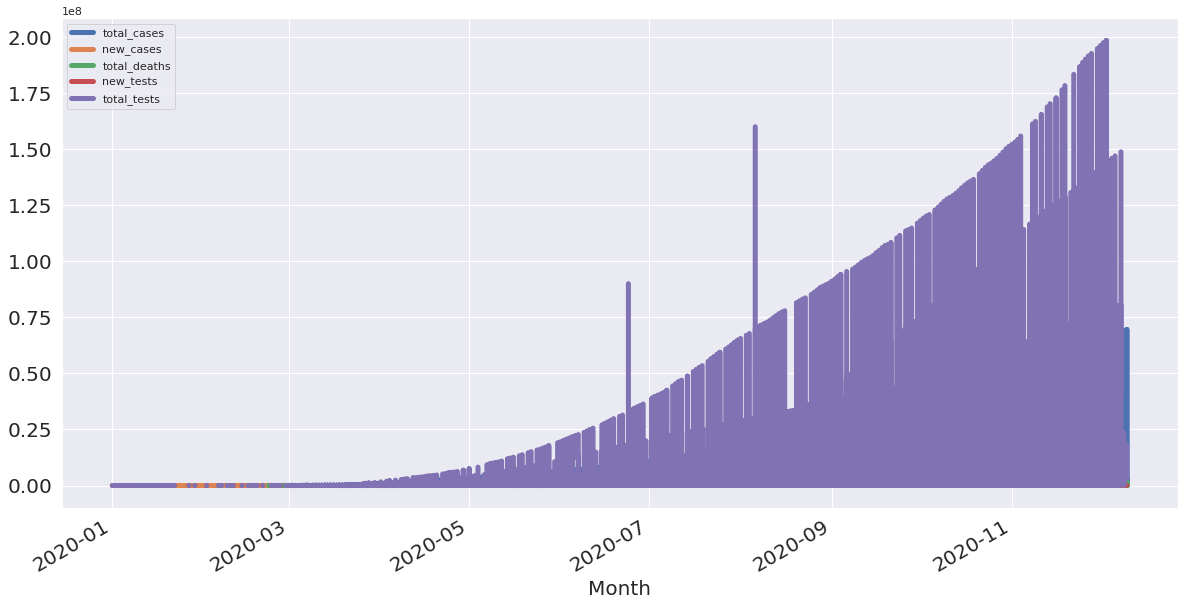

In [14]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

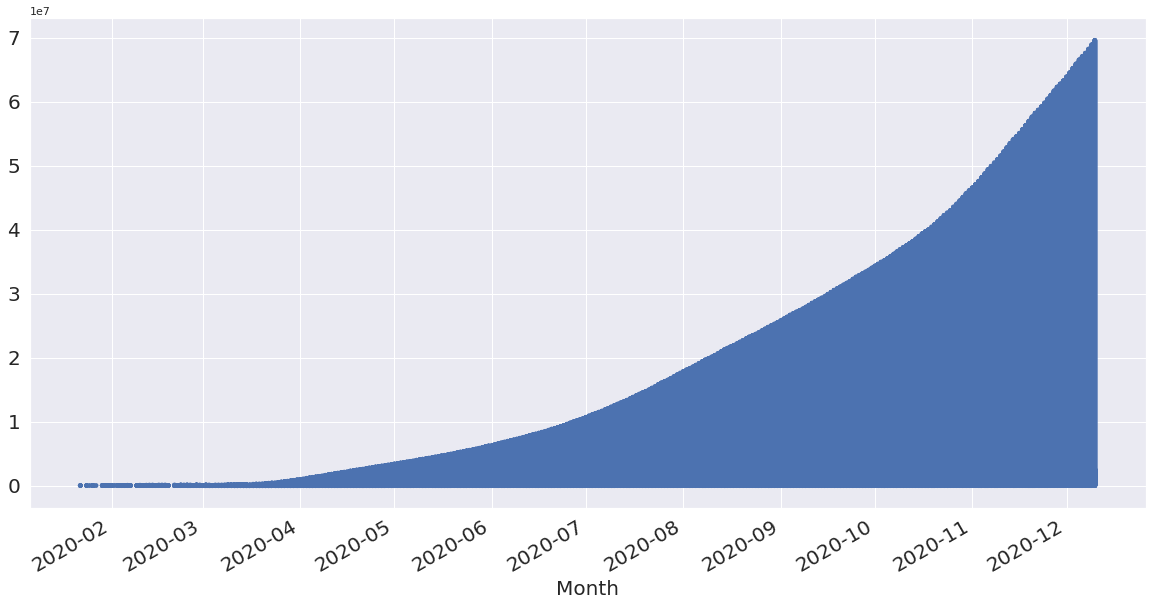

In [15]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

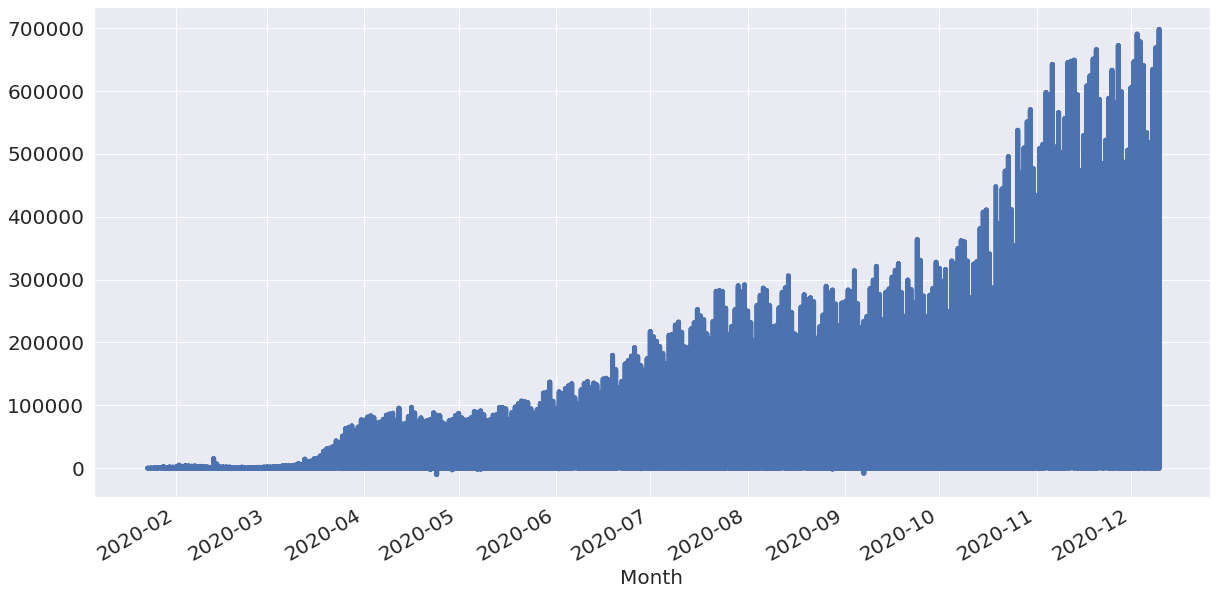

In [16]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

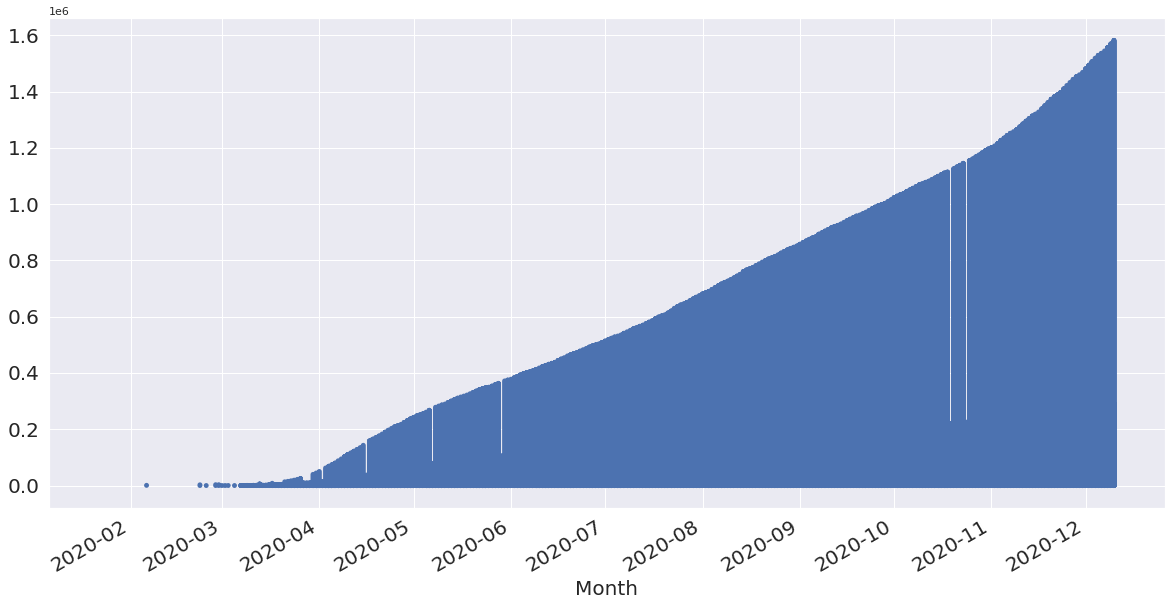

In [17]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

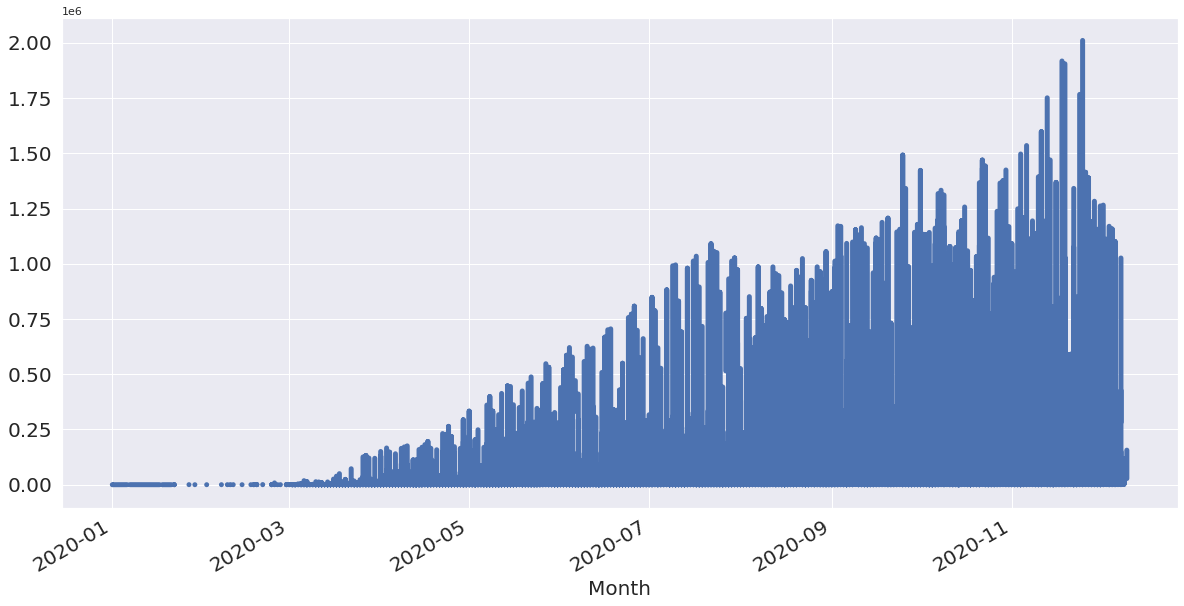

In [18]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

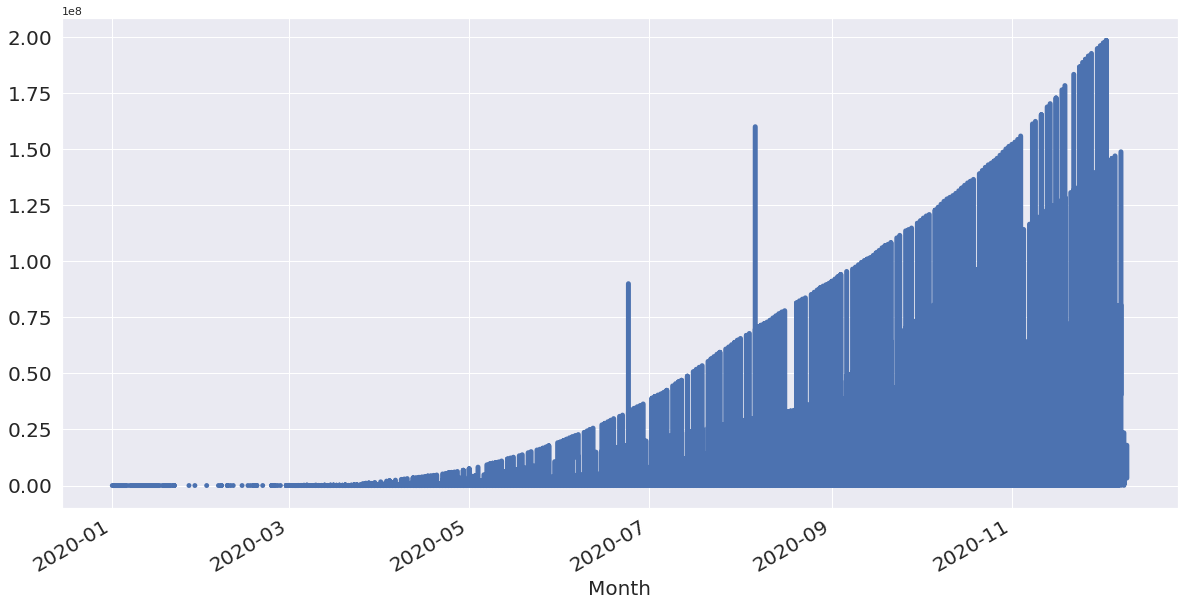

In [19]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

# Trends and Seasonality in TimeSeries Data

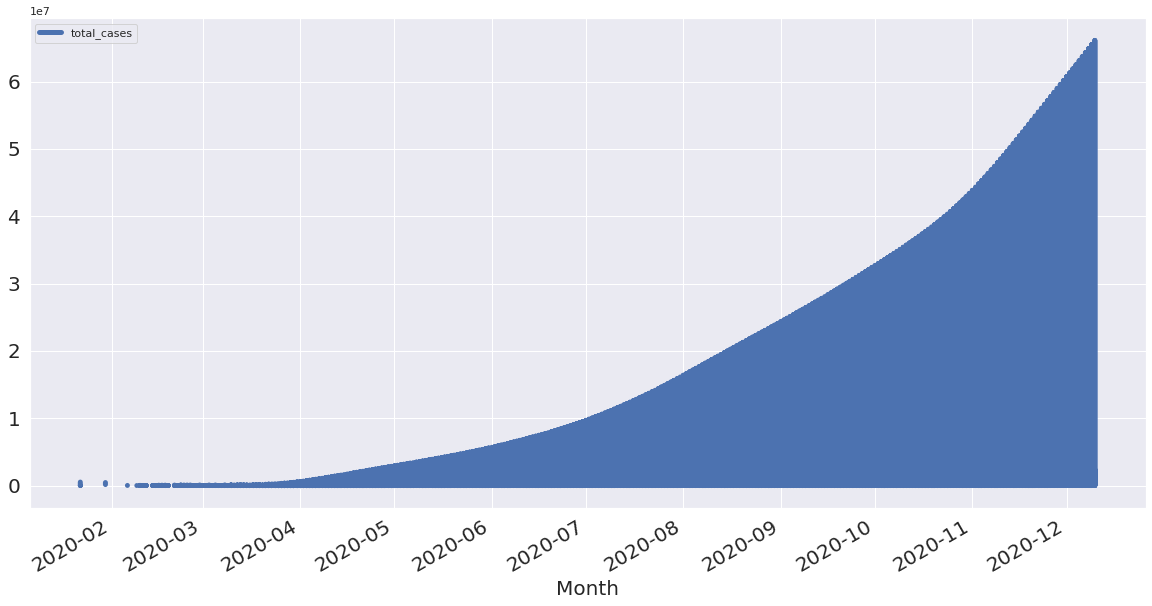

In [20]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

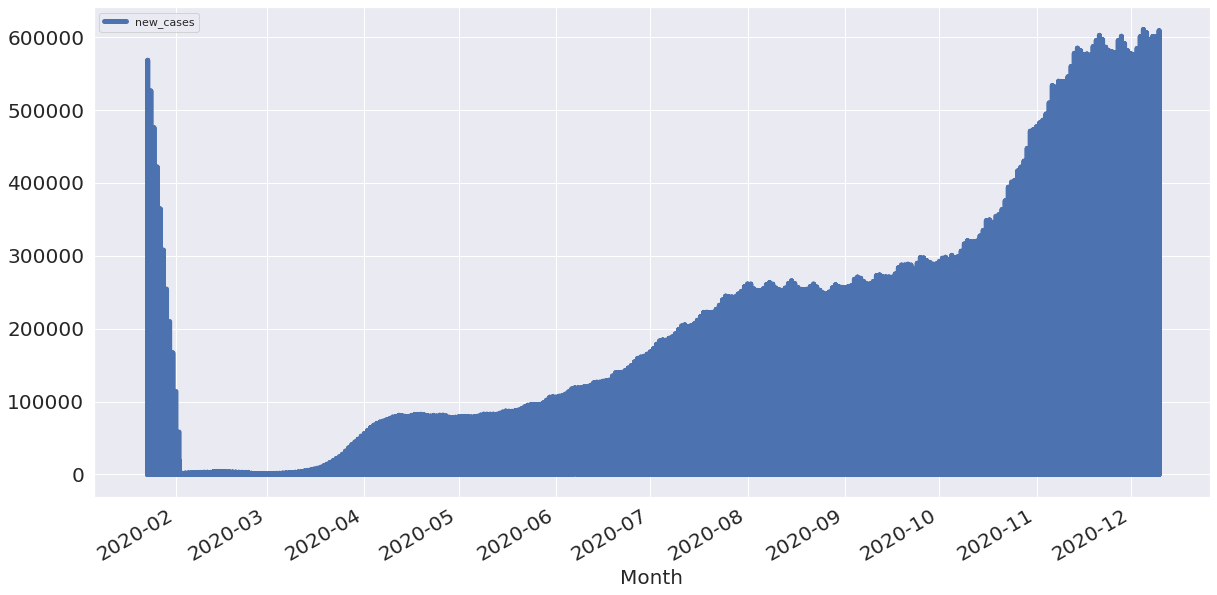

In [21]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

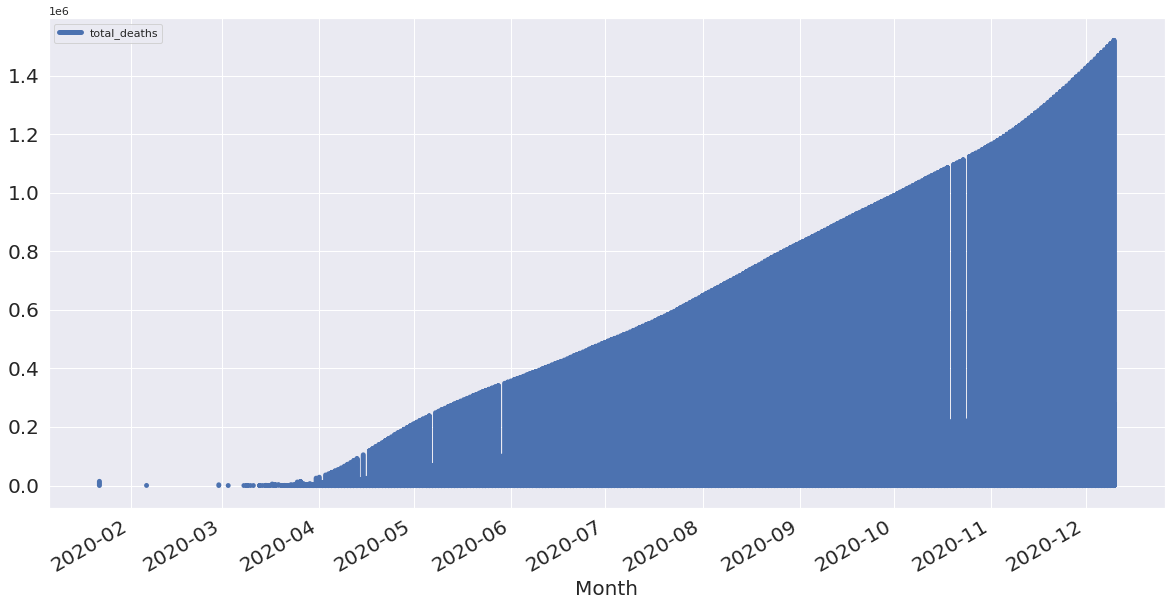

In [22]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

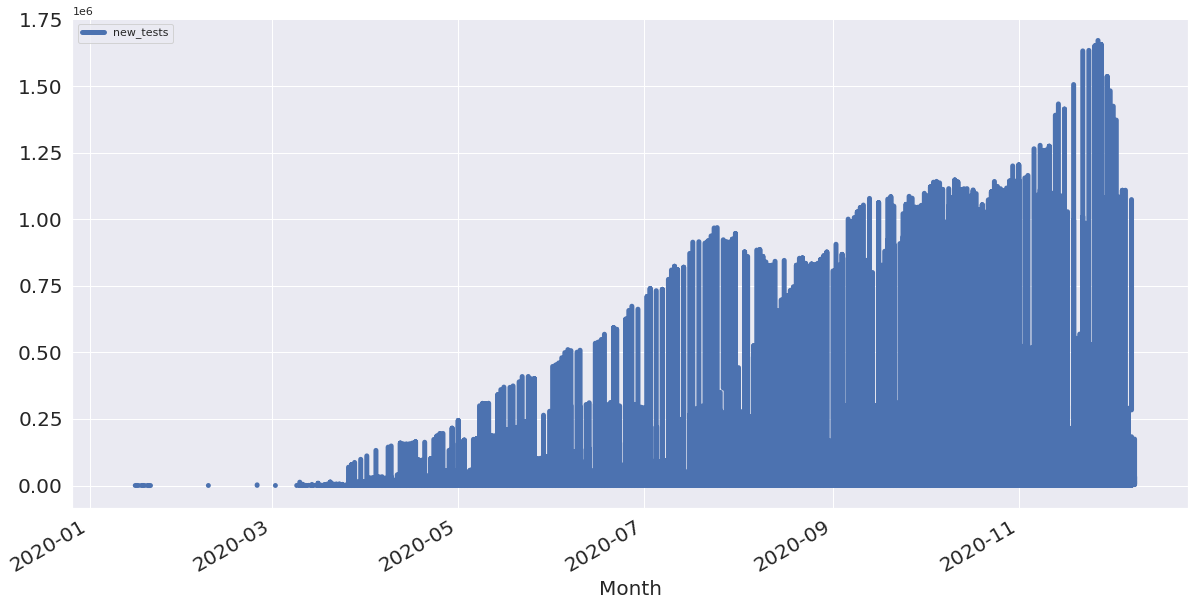

In [23]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

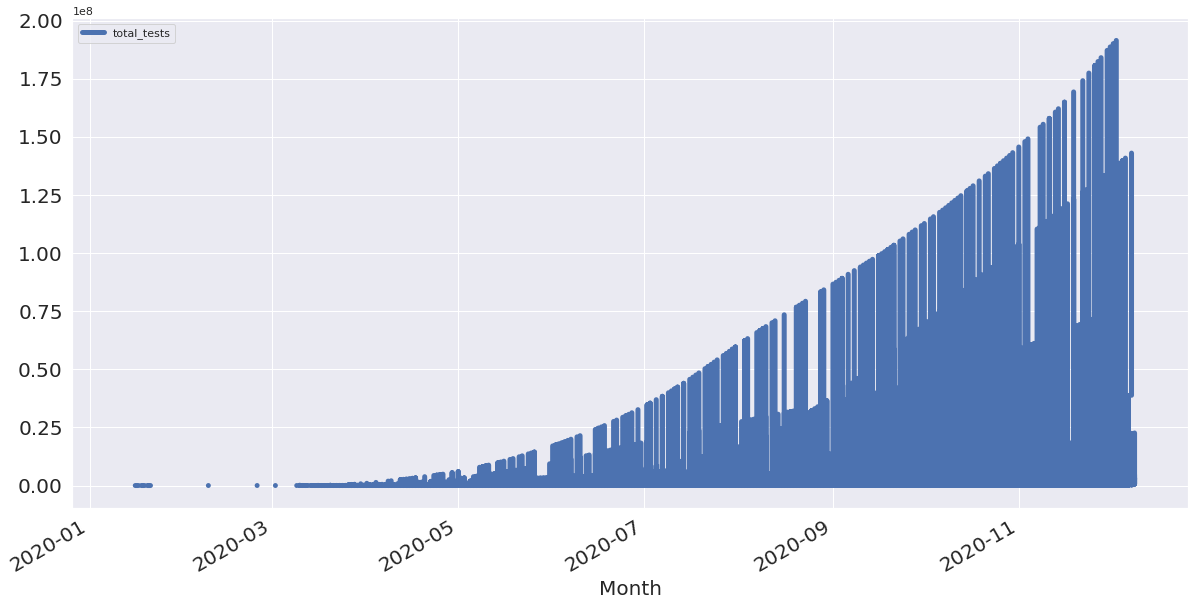

In [24]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

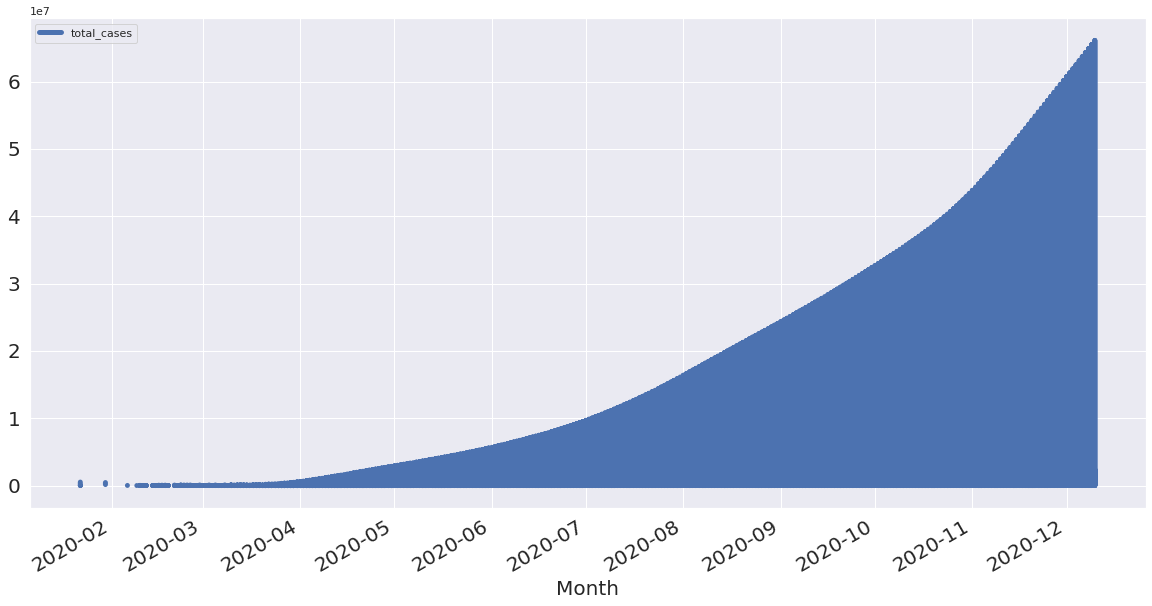

In [25]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);